In [82]:
import librosa
import IPython.display as ipd
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write
import time
#import an audio wav

#'C:/Users/Abdelouahab/Downloads/female/en-0532.wav'

Data, fs = librosa.load('C:/Users/Abdelouahab/Documents/M&M/Aaron-20080318-kdl/wav/b0020.wav')

In [83]:
#play your imported audio --numpy
def playaudio(audio,freqns):
    sd.play(audio, freqns)
    sd.wait()
playaudio(Data,fs)

In [3]:
#save a recorded audio --numpy 
def SaveRecord(recording:np.ndarray,fs: int):
    write('sounds/audio'+ str(int(time.time())) +'.wav', fs, recording)

In [85]:
#this function takes an numpy audio and return the spectral properties below
def spectral_properties(y: np.ndarray, fs: int) -> dict:
    spec = np.abs(np.fft.rfft(y))
    freq = np.fft.rfftfreq(len(y), d=1/fs)
    spec = np.abs(spec)
    amp = spec / spec.sum()
    mean = (freq * amp).sum()
    sd = np.sqrt(np.sum(amp * ((freq - mean) ** 2)))
    amp_cumsum = np.cumsum(amp)
    median = freq[len(amp_cumsum[amp_cumsum <= 0.5]) + 1]
    mode = freq[amp.argmax()]
    Q25 = freq[len(amp_cumsum[amp_cumsum <= 0.25]) + 1]
    Q75 = freq[len(amp_cumsum[amp_cumsum <= 0.75]) + 1]
    IQR = Q75 - Q25
    z = amp - amp.mean()
    w = amp.std()
    skew = ((z ** 3).sum() / (len(spec) - 1)) / w ** 3
    kurt = ((z ** 4).sum() / (len(spec) - 1)) / w ** 4
    result_d = {
        'meanfreq': mean/1000,
        'sd': sd/1000,
        'median': median/1000,
        'mode': mode/1000,
        'Q25': Q25/1000,
        'Q75': Q75/1000,
        'IQR': IQR,
        'skew': skew,
        'kurt': kurt/1000,
    }
    return result_d

In [8]:
spectral_properties(Data,fs)

{'meanfreq': 1075.5447081857767,
 'sd': 919.7310898835849,
 'median': 722.8773773156379,
 'Q25': 404.6385319236937,
 'Q75': 1514.5545050176688,
 'IQR': 1109.915973093975,
 'skew': 4.205775251095901,
 'kurt': 26.069438926838146,
 'mode': 450.2383664821171}

In [96]:
import time 
time.sleep(1)
duration = 3 #audion lenght
fs = 48000 #frequence
channels = 2 #how many voice input on your pc
# record your own audio
recorded = sd.rec(int(duration * fs), samplerate=fs, channels=channels)
sd.wait()
Data= recorded

In [88]:
SaveRecord(recorded, fs)

NameError: name 'SaveRecord' is not defined

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')
Data Frame Shape: (3168, 21)
          meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt         mode  
count

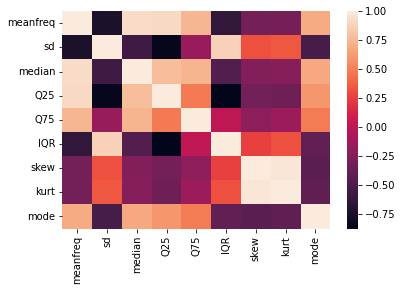

0.9391343552750225


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
def NormalizeData(Data,Max,Min):
        return (Data - Min )/ (Max - Min)
def Main():
    VoiceDataSet = pd.read_csv("C:/Git-hub/Python/Semester4/MachineLearning/MiniProject/App/voice.csv")
    # Print head
#     VoiceDataSet = VoiceDataSet.drop(['Unnamed: 0'], axis=1)
#     print(VoiceDataSet.head())
    
    
    # nbr of clumns
    print(VoiceDataSet.columns)
    # change colomn data type
#     for i in range(len(VoiceDataSet.columns)-1):
#         VoiceDataSet.astype({VoiceDataSet.columns[i]: 'int32'}).dtypes
    # shuffle data for more training compatibilty
#     VoiceDataSet = VoiceDataSet.reindex(np.random.permutation(VoiceDataSet.index))
    VoiceDataSet = VoiceDataSet.sample(frac=1).reset_index(drop=True)
    #dataframe shape
    print("Data Frame Shape:",VoiceDataSet.shape)
    
#     VoiceDataSet = VoiceDataSet[VoiceDataSet["10"] != "other"]
#     VoiceDataSet=VoiceDataSet.sort_values(by=['10'])
    #counting values male and female
#     VoiceDataSet = VoiceDataSet[0:40]
#     print(VoiceDataSet["10"].value_counts())
    VoiceDataSet = VoiceDataSet.drop(['sp.ent','sfm','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx',], axis=1)
    print(VoiceDataSet.describe())

    #show the Relations between attributes
    correlation = VoiceDataSet.corr()
    sns.heatmap(correlation)
    plt.show()
    
    
    # extract attributes
    X_ = VoiceDataSet.drop(['label'], axis=1)
#     Xnorm=np.zeros(len(X_))
#     from sklearn.preprocessing import normalize
#     for i in range(9):
#         X_[X_.columns[i]] = NormalizeData(X_[X_.columns[i]],max(X_[X_.columns[i]]),min(X_[X_.columns[i]]))
#         print(arr1)
#         Xnorm = np.c_[Xnorm, arr1]
#     print(X_)
    # extract Labeles/targets
    Y_ = VoiceDataSet['label']
    #split data 
    X_train , X_test , y_train , y_test = train_test_split(X_,Y_, test_size=0.7)
    
    # initualize random forest algo
    Model = RandomForestClassifier(random_state=0)

    Model.fit(X_train,y_train)
    
    # Print the model score
    print(Model.score(X_test,y_test))
     
    return Model
Model = Main()

In [97]:
procceddata = spectral_properties(Data[:,0],fs)
sd.play(Data, fs)
sd.wait()
print(procceddata)
Xpred = pd.DataFrame(procceddata,index=[0])
Xpred.head()
Model.predict(Xpred)


{'mean': 2.8837425472042706, 'sd': 3.155853564674591, 'median': 1.2553333333333332, 'mode': 0.036, 'Q25': 0.16966666666666666, 'Q75': 5.766333333333333, 'IQR': 5596.666666666666, 'skew': 36.27743489750397, 'kurt': 1.780628036809368}


C:\Users\Abdelouahab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- mean
Feature names seen at fit time, yet now missing:
- meanfreq

  warnings.warn(message, FutureWarning)


array(['female'], dtype=object)